# 7 - Plot Figure 14
# Optimising Modulation: Reducing the Network Connections

This notebook plots figure 14 from *Section 9.3: Optimising Modulation*.

By default, this notebook uses previously generated data stored in the `examples\experiment_results\experiment_B_modulation_e` and `examples\experiment_results\experiment_B_modulation_i` folders. If you would like to generate fresh data to be plotted, use the notebook `6 - Experiment_B_modulation - Run.ipynb`.

To examine the effect of the modulation optimisations on ESAM network modulations, experiment B was used as described below. The aim of this experiment is to reduce the number of hidden to feature connections, without impacting network efficacy.

<table>
<tr><td>

| Problem B    |          |
| :----------- | :------  | 
| $f$          | 2,000      | 
| $m$          | 1,000 | 
| $s_m$        | 0.1     | 
| $s_n$        | Varying      | 
</td><td>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
</td><td>

| Network B (Baseline) |          |
| :--------------------| :------  | 
| $h$                  | 2        | 
| $\theta$             | 12       | 
| $s^+_{f\_h}$         | 0.1      | 
| $\sigma_{h\_pre+}$   | `FixedProbability` | 
| $s^+_{h\_f}$         | 0-1 (set to 1 when  $s^-_{h\_f}$ is varied)   | 
| $s^-_{h\_f}$         | 0-1 (set to 1 when  $s^+_{h\_f}$ is varied)   | 
| $\sigma_{f\_pre+}$, $\sigma_{f\_pre-}$  |  `FixedProbability`       | 
| $e$                  | 3        | 

</td></tr> </table>

The accuracy of two different networks are compared in the graphs as the excitatory $s^+_{h\_f}$ and inhibitory $s^-_{h\_f}$ modulation sparsities vary. The number of network connections in each case are also plotted. 

* Network B - the baseline network (as described above).
* Network B with the modulation connections optimised as described in section 7.1.

## Dependencies

In [1]:
import sys
sys.path.append('../src')
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from simulation_scripts.test_suite_reader import TestSuiteReader, get_topology_data_for_test
from simulation_scripts.utils.excel_handler import ExcelHandler, get_timestamp_str

plt.tight_layout()
sns.set_theme(style="whitegrid")

<Figure size 640x480 with 0 Axes>

## Set up the test suite details

Specify where the plot data will be aquired from.

In [2]:
# The directory containing the test data
data_base_dir = 'experiment_results'

# The tests dictionary is a mapping between the excel files that contain the data and 
# the names that will appear in the plots.
tests = {'original': 'Network B (baseline)',
         'opt_conns': 'Network B with modulation connections optimized'}
test_files = list(tests.keys())

# The name of the data sheet in each of the excel files that contains the relevant data.
data_sheet = 'paper_data'
# If the test suites are re-run, the latest data will always be stored in 'latest_data'. Uncomment the following
# line to pick up this data.
# data_sheet = 'latest_data'

# test_suite_type defines whether aspects of the problem space or the network are varied 
# for each test. This is necessary for generating the theoretical data. 
test_suite_type='vary_network'

# All the graphs will vary according to the sparsity of the modulation connections. Hence, the 
# x column remains static throughout.
x_col = 'Modulation sparsity'

## Figure 14: Accuracy

Plot the accuracy graphs. One for descreasing excitatory hidden to feature connections and one for decreasing inhibitory hidden to feature connections.

### Read in the data

Combine the data into a single pandas dataframe (plot_tests).

In [3]:
def get_plot_data(test_group_name: str, test_type: str, x_column: str):
    base_dir = data_base_dir+os.sep+test_group_name
    test_reader = TestSuiteReader(test_dir=base_dir,
                                  test_suite_type=test_suite_type,
                                  tests = tests,
                                  test_data_sheet=data_sheet)
    all_tests = test_reader.get_tests_data()
    all_tests['test_type']=test_type         
    all_tests[x_col]=all_tests[x_column]         

    # Filter on the final epoch - acquired from the static description of one of the tests
    reader = ExcelHandler(base_dir, 'original')
    network_static = reader.read_sheet(sheet_name='network_default').iloc[0]
    return all_tests.copy().loc[all_tests['epoch'] == network_static['e']]

hue_order = []
for test_file, test_name in tests.items():
    hue_order.append(test_name)

plot_data_e = get_plot_data(test_group_name='experiment_B_modulation_e',
                            test_type='Reducing excitatory connections', 
                            x_column='net_param_h_f_sparsity_e')

plot_data_i = get_plot_data(test_group_name='experiment_B_modulation_i',
                            test_type='Reducing inhibitory connections', 
                            x_column='net_param_h_f_sparsity_i')

plot_data = pd.concat([plot_data_e, plot_data_i])

tests are :  ['original', 'opt_conns']
test dir:  experiment_results/experiment_B_modulation_e
Using the following pre-generated data:

  File                                                            Data Sheet
  ---------------------------------------------------------------------------
  experiment_results/experiment_B_modulation_e/original.xlsx      paper_data
  experiment_results/experiment_B_modulation_e/opt_conns.xlsx     paper_data

TestSuiteResults successfully initialised for tests ['original', 'opt_conns']
tests are :  ['original', 'opt_conns']
test dir:  experiment_results/experiment_B_modulation_i
Using the following pre-generated data:

  File                                                            Data Sheet
  ---------------------------------------------------------------------------
  experiment_results/experiment_B_modulation_i/original.xlsx      paper_data
  experiment_results/experiment_B_modulation_i/opt_conns.xlsx     paper_data

TestSuiteResults successfully 

### Draw the plot

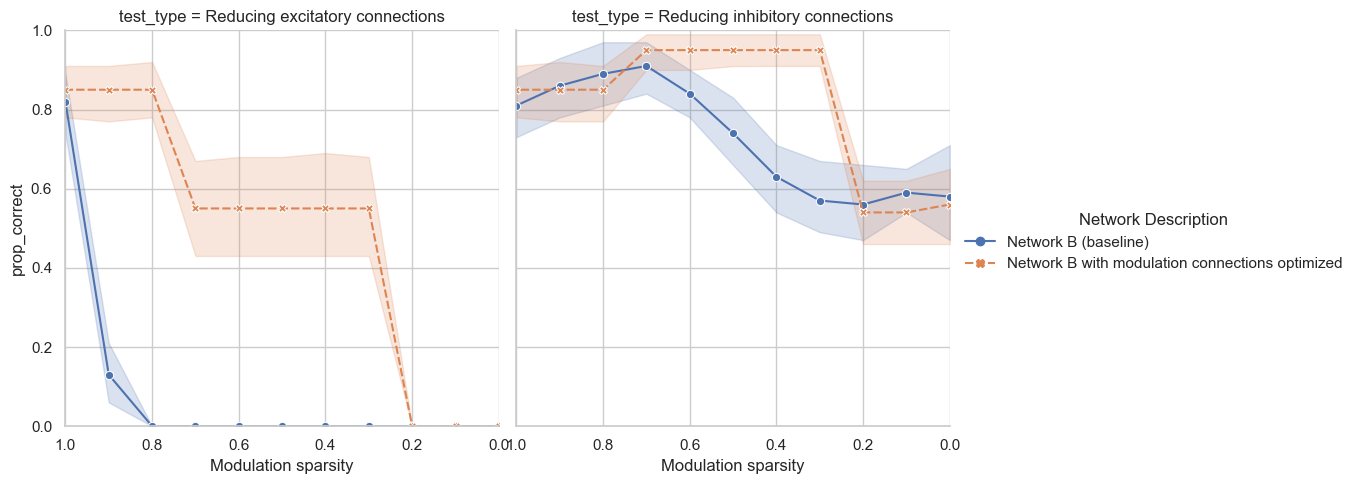

In [4]:
line_key_name = 'Network Description'
plot_data[line_key_name] = plot_data['test'].astype('category')

y_col = 'prop_correct'

sns.relplot(data=plot_data,
            x=x_col,
            y=y_col,
            style=line_key_name,
            kind='line',
            markers=True,
            hue=line_key_name,
            hue_order=hue_order,
            col='test_type'
            )

plt.xlim(plot_data[x_col].min(), plot_data[x_col].max())
plt.ylim(0, 1)
plt.gca().invert_xaxis()

# Uncomment the following two lines to save the figure in a timestamped file in the figures dir.
# (The timestamp is added to avoid accidental overwrite)
#tstamp = get_timestamp_str()
#plt.savefig('..'+os.sep+'figures'+os.sep+'figure14_accuracy_'+tstamp+'.png', dpi=1000, bbox_inches='tight')

plt.show()

## Figure 14:  Number of modulation connections

Plot the topology statistics graphs. One for descreasing excitatory hidden to feature connections and one for decreasing inhibitory hidden to feature connections.

### Generate the topology data for the plots

In [5]:
test_dir_e = data_base_dir+os.sep+'experiment_B_modulation_e'
test_file_e = 'opt_conns'
x_column_e = 'net_param_h_f_sparsity_e'
plot_data_e = get_topology_data_for_test(test_dir=test_dir_e,
                                test_file=test_file_e,
                                data_sheet=data_sheet,
                                variable_column=x_column_e)
plot_data_e[x_col]=plot_data_e[x_column_e]  
plot_data_e['test_type'] = 'Reducing excitatory connections'

test_dir_i = data_base_dir+os.sep+'experiment_B_modulation_i'
test_file_i = 'opt_conns'
x_column_i = 'net_param_h_f_sparsity_i'
plot_data_i = get_topology_data_for_test(test_dir=test_dir_i,
                                test_file=test_file_i,
                                data_sheet=data_sheet,
                                variable_column=x_column_i)
plot_data_i[x_col]=plot_data_i[x_column_i]  
plot_data_i['test_type'] = 'Reducing inhibitory connections'

plot_data = pd.concat([plot_data_e, plot_data_i])
plot_data

Generating topology data for test: experiment_results/experiment_B_modulation_e/opt_conns and datasheet: paper_data
Generating topology data for test: experiment_results/experiment_B_modulation_i/opt_conns and datasheet: paper_data


,net_param_f,net_param_h,data_param_m,net_param_f_h_sparsity,net_param_h_f_sparsity_e,net_param_h_f_sparsity_i,data_param_s_m,conns_f_h,conns_h_f_e,conns_h_f_i,conns_h_f,conns_total,Modulation sparsity,test_type
0,2000,2,1000,0.1,0.0,1.0,0.1,40000.0,0.0,3600000.0,3600000.0,3640000.0,0.0,Reducing excitatory connections
40,2000,2,1000,0.1,0.1,1.0,0.1,40000.0,40000.0,3600000.0,3640000.0,3680000.0,0.1,Reducing excitatory connections
80,2000,2,1000,0.1,0.2,1.0,0.1,40000.0,80000.0,3600000.0,3680000.0,3720000.0,0.2,Reducing excitatory connections
120,2000,2,1000,0.1,0.3,1.0,0.1,40000.0,120000.0,3600000.0,3720000.0,3760000.0,0.3,Reducing excitatory connections
160,2000,2,1000,0.1,0.4,1.0,0.1,40000.0,160000.0,3600000.0,3760000.0,3800000.0,0.4,Reducing excitatory connections
200,2000,2,1000,0.1,0.5,1.0,0.1,40000.0,200000.0,3600000.0,3800000.0,3840000.0,0.5,Reducing excitatory connections
240,2000,2,1000,0.1,0.6,1.0,0.1,40000.0,240000.0,3600000.0,3840000.0,3880000.0,0.6,Reducing excitatory connections
280,2000,2,1000,0.1,0.7,1.0,0.1,40000.0,280000.0,3600000.0,3880000.0,3920000.0,0.7,Reducing excitatory connections
320,2000,2,1000,0.1,0.8,1.0,0.1,40000.0,320000.0,3600000.0,3920000.0,3960000.0,0.8,Reducing excitatory connections
360,2000,2,1000,0.1,0.9,1.0,0.1,40000.0,360000.0,3600000.0,3960000.0,4000000.0,0.9,Reducing excitatory connections


### Draw the plot

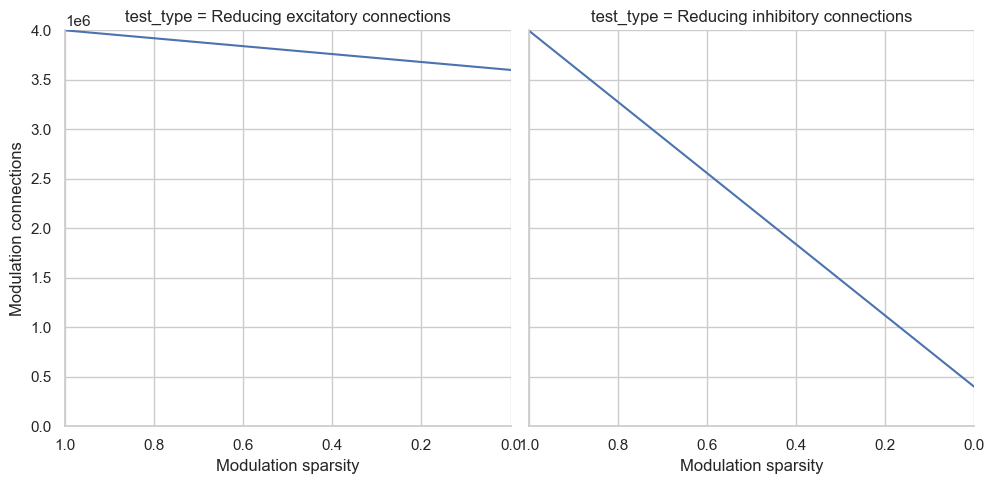

In [6]:
line_key_name = 'Network Description'

y_col = 'Modulation connections'
plot_data = plot_data.rename(columns={'conns_h_f': y_col})

sns.relplot(data=plot_data,
            x=x_col,
            y=y_col,
            kind='line',
            col='test_type'
            )

plt.xlim(plot_data[x_col].min(), plot_data[x_col].max())
plt.ylim(0, 4000000)
plt.gca().invert_xaxis()

# Uncomment the following two lines to save the figure in a timestamped file in the figures dir.
# (The timestamp is added to avoid accidental overwrite)
# tstamp = get_timestamp_str()
# plt.savefig('..'+os.sep+'figures'+os.sep+'figure14_connections_'+tstamp+'.png', dpi=400, bbox_inches='tight')

plt.show()